# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [4]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [5]:
# Read the Mapbox API key
import hvplot.pandas
load_dotenv("example.env")
mapbox_token = os.getenv("mapbox")

## Load Data

In [6]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [42]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_per_year = sfo_data[['year', 'housing_units']]
housing_avg = housing_per_year.groupby('year').mean()
housing_avg

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

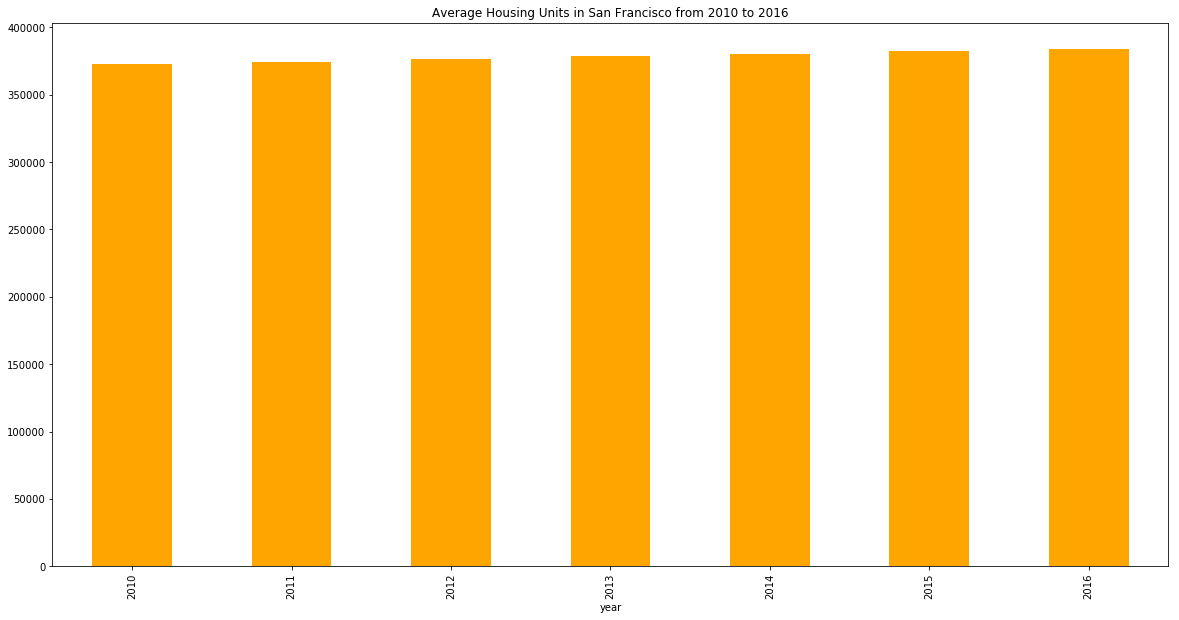

In [44]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
housing_plot = housing_avg.plot(kind = "bar", figsize=(20,10), legend = False, title = "Average Housing Units in San Francisco from 2010 to 2016", color = "orange")

# # Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# # YOUR CODE HERE!

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [9]:
# Calculate the average gross rent and average sale price per square foot
# # YOUR CODE HERE!
gross_rent = sfo_data[['year', 'gross_rent']]
avg_gross_rent = gross_rent.groupby('year').mean()


sale_price = sfo_data[['year', 'sale_price_sqr_foot']]
avg_sale_price = sale_price.groupby('year').mean()
avg_sale_price

average_prices = pd.concat([avg_gross_rent, avg_sale_price], axis = "columns", join = "inner")
average_prices

gross_rent  sale_price_sqr_foot
year                                 
2010        1239           369.344353
2011        1530           341.903429
2012        2324           399.389968
2013        2971           483.600304
2014        3528           556.277273
2015        3739           632.540352
2016        4390           697.643709

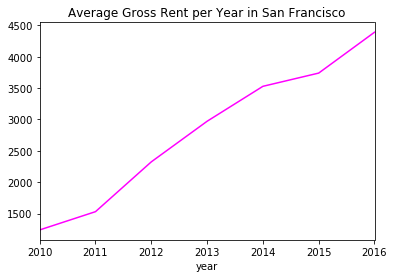

In [12]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
avg_gross_rent.plot(legend = False, title = 'Average Gross Rent per Year in San Francisco', color = "magenta")

### Average Sales Price per Year

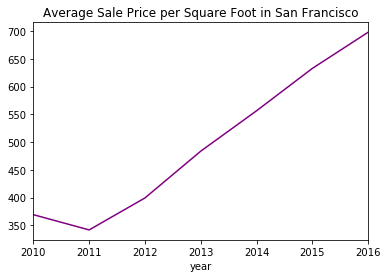

In [14]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
avg_sale_price.plot(legend = False, title = 'Average Sale Price per Square Foot in San Francisco', color = "purple")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
avg_price_per_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
avg_price_per_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
avg_price_per_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
avg_price_per_neighborhood.hvplot.line(x = 'year', xlabel = 'Year', y = 'sale_price_sqr_foot', ylabel = 'Sale Price per Square Foot', groupby="neighborhood", color = "aqua")
neighborhood_choice = avg_price_per_neighborhood.groupby("neighborhood")

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [16]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
neighborhood_prices = sfo_data.groupby(['neighborhood']).mean()
top_ten = neighborhood_prices.sort_values('sale_price_sqr_foot', ascending = False).drop(columns = 'year').head(10)
top_ten

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000

In [17]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
neighborhood_top_ten = top_ten.drop(columns = ['housing_units', 'gross_rent'])
neighborhood_top_ten.hvplot(kind='bar', legend = False, figsize=(20,10), xlabel = 'Neighborhood', ylabel = 'Sale Price per Square Foot', title = "Top 10 Most Expensive Neighborhoods in San Francisco", color = "green")

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

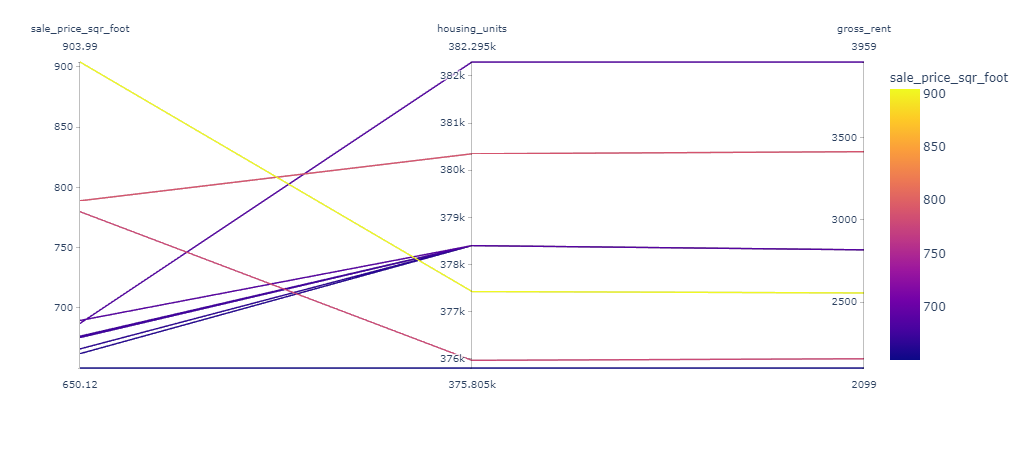

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
top_ten_index = top_ten.reset_index()
px.parallel_coordinates(top_ten_index, color='sale_price_sqr_foot')

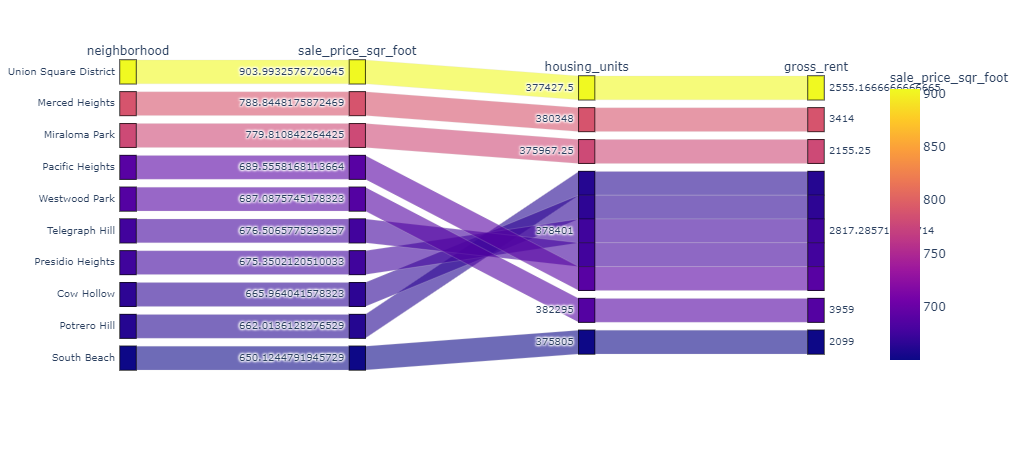

In [14]:
# Parallel Categories Plot
# YOUR CODE HERE! PREP
px.parallel_categories(top_ten_index, color='sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [15]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path, index_col="Neighborhood")
df_neighborhood_locations.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [16]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
avg_per_neighborhood = sfo_data.groupby(['neighborhood']).mean().drop(columns = 'year')
avg_per_neighborhood.head()

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [17]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
averages_df = pd.concat([df_neighborhood_locations, avg_per_neighborhood], axis = "columns", join = "inner")
averages_df.head()

Lat         Lon  sale_price_sqr_foot  housing_units  \
Alamo Square      37.791012 -122.402100           366.020712       378401.0   
Anza Vista        37.779598 -122.443451           373.382198       379050.0   
Bayview           37.734670 -122.401060           204.588623       376454.0   
Bayview Heights   37.728740 -122.410980           590.792839       382295.0   
Buena Vista Park  37.768160 -122.439330           452.680591       378076.5   

                   gross_rent  
Alamo Square      2817.285714  
Anza Vista        3031.833333  
Bayview           2318.400000  
Bayview Heights   3739.000000  
Buena Vista Park  2698.833333

### Mapbox Visualization

Plot the average values per neighborhood with a plotly express scatter_mapbox visualization.

In [20]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
data_to_plot = averages_df[["Lat", "Lon", "sale_price_sqr_foot", "gross_rent"]]

map = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title= "Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

# Display the map
map.show()

In [57]:
data_to_plot = averages_df[["Lat", "Lon", "sale_price_sqr_foot", "gross_rent"]]
map = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title= "Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

# Display the map
map.show()

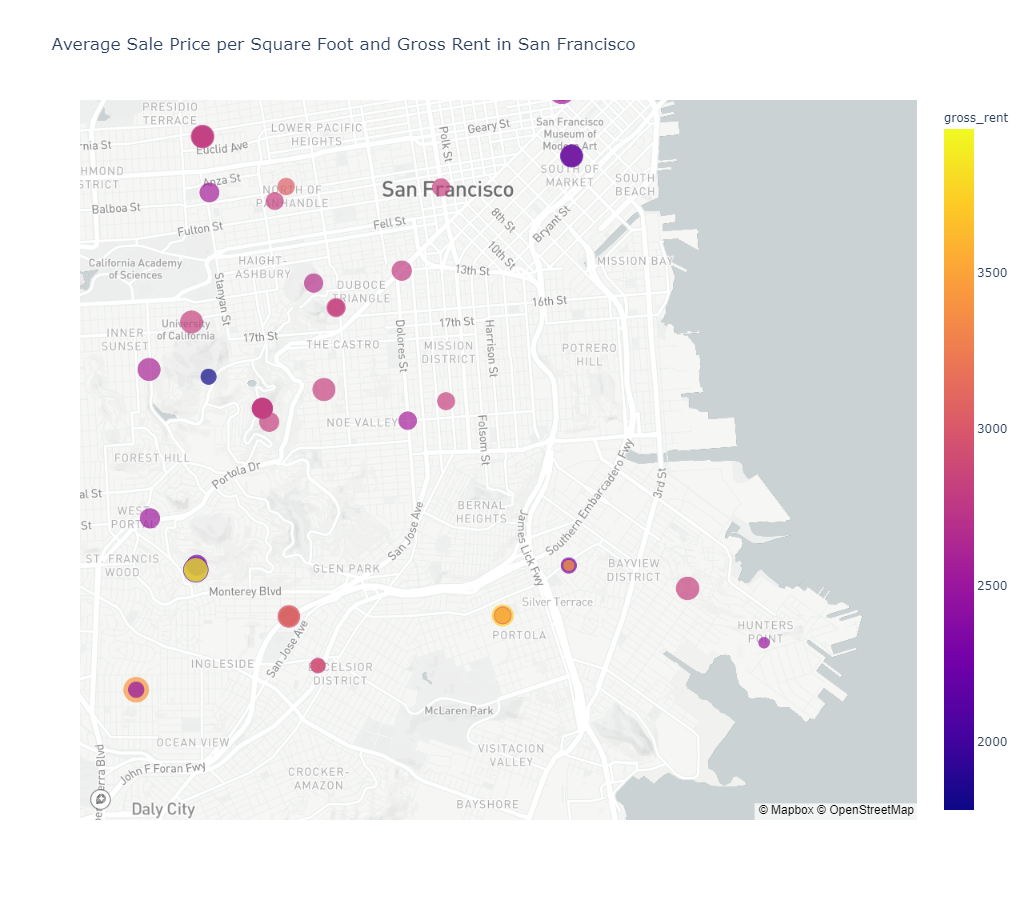

In [18]:
px.set_mapbox_access_token(mapbox_token)

data_to_plot = averages_df[["Lat", "Lon", "sale_price_sqr_foot", "gross_rent"]]

map = px.scatter_mapbox(
    data_to_plot,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title= "Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

# Display the map
map.show()